In [17]:
# System
import os
#nltk.download('stopwords')
# Time
import time
import datetime

# Numerical
import numpy as np
import pandas as pd

# Tools
import itertools
from collections import Counter
from wordcloud import WordCloud,STOPWORDS

# Visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager
import seaborn as sns
%matplotlib inline

# Pre-processing
from bs4 import BeautifulSoup
import re

In [31]:
df = pd.read_csv('data/twitter_sentiment_data.csv')

In [3]:
df.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43943 entries, 0 to 43942
Data columns (total 3 columns):
sentiment    43943 non-null int64
message      43943 non-null object
tweetid      43943 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.0+ MB


In [5]:
# checking if there are any null values
df[df.isnull().any(axis=1)].head()

,sentiment,message,tweetid


In [6]:
df.sentiment.value_counts()

 1    22962
 2     9276
 0     7715
-1     3990
Name: sentiment, dtype: int64

In [7]:
# dropping unwanted columns
df.drop(['tweetid'],axis=1,inplace=True)
df.head()

,sentiment,message
0,-1,@tiniebeany climate change is an interesting h...
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...
3,1,RT @Mick_Fanning: Just watched this amazing do...
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ..."


In [8]:
# checking for tweet lenghts to see the outliers
df['tweet_len'] = [len(t) for t in df.message]
df.head()

,sentiment,message,tweet_len
0,-1,@tiniebeany climate change is an interesting h...,137
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,146
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,117
3,1,RT @Mick_Fanning: Just watched this amazing do...,143
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",139


In [30]:
# creating a copy of the dataframe for further visualising and cleaning
nlp_df=df.copy()
nlp_df.head()

,sentiment,message,tweet_len
0,-1,@tiniebeany climate change is an interesting h...,137
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,146
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,117
3,1,RT @Mick_Fanning: Just watched this amazing do...,143
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",139


## Visualizing Data before Cleaning

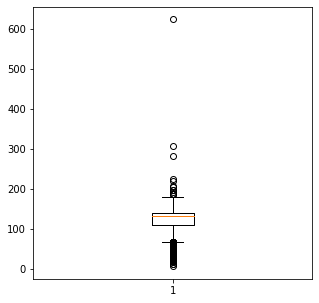

In [12]:
# plotting box plot to figure out if the tweet lengths are more than 140 characters
fig, ax = plt.subplots(figsize=(5, 5))
plt.boxplot(df.tweet_len)
plt.show()

[]

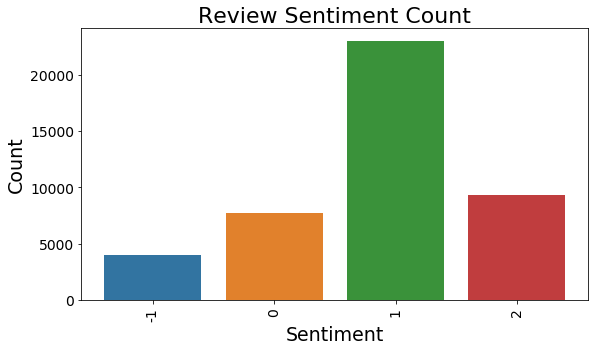

In [13]:
figsize=(20, 5)

ticksize = 14
titlesize = ticksize + 8
labelsize = ticksize + 5

params = {'figure.figsize' : figsize,
          'axes.labelsize' : labelsize,
          'axes.titlesize' : titlesize,
          'xtick.labelsize': ticksize,
          'ytick.labelsize': ticksize}

plt.rcParams.update(params)

plt.subplot(122)
col = "sentiment"
xlabel = "Sentiment"
ylabel = "Count"
sns.countplot(df[col])
# creating titles and labels
plt.title("Review Sentiment Count")
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.xticks(rotation=90)
plt.plot()

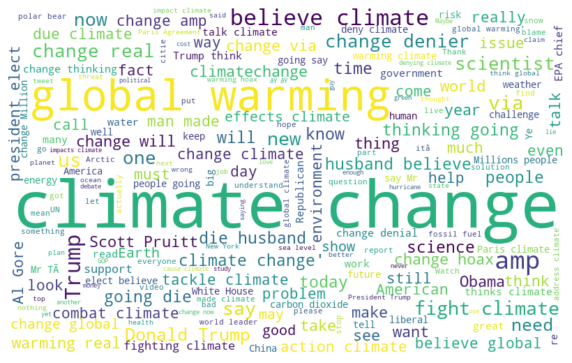

In [14]:
# generating wordcloud 

# joining tweets to a single string
words = ' '.join(df['message'])

# remove URLs, RTs, and twitter handles
no_urls_no_tags = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
# basic wordcloud without separating positive and negative tweets
wordcloud = WordCloud(
                      stopwords=STOPWORDS,
                      background_color='white',width=800, height=500, random_state=21, max_font_size=110
                     ).generate(no_urls_no_tags)


plt.figure(figsize=(10, 7))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis('off')
#plt.savefig('./twitter_wordcloud.png', dpi=360)
plt.show()

## Data Cleaning

In [15]:
df[df.tweet_len > 140].head(10)

,sentiment,message,tweet_len
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,146
3,1,RT @Mick_Fanning: Just watched this amazing do...,143
7,2,RT @CCIRiviera: Presidential Candidate #Donald...,142
8,0,RT @AmericanIndian8: Leonardo DiCaprio's clima...,146
10,1,RT @DrDeJarnett: It's vital that the public he...,146
11,1,"Bangladesh did not cause climate change, so th...",158
12,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,146
14,2,RT @WorldResources: Reflections on Leonardo Di...,153
15,1,RT @littoralsociety: The problem with global w...,153
18,1,RT @ClimateCentral: Here's how climate change ...,141


#### Looks like html encoding has not been converted to text, let us parse it with Beautifulsoup and clean the data further

In [18]:
# making a copy of the dataframe to further clean
df_pr = nlp_df
#Beautiful Soup is a library that makes it easy to scrape information from web pages.
#It sits atop an HTML or XML parser, providing Pythonic idioms for iterating, searching, and modifying the parse tree.
df_pr["message"] = df_pr["message"].apply(lambda x: BeautifulSoup(x, "lxml").get_text())
print(df_pr["message"])

0        @tiniebeany climate change is an interesting h...
1        RT @NatGeoChannel: Watch #BeforeTheFlood right...
2        Fabulous! Leonardo #DiCaprio's film on #climat...
3        RT @Mick_Fanning: Just watched this amazing do...
4        RT @cnalive: Pranita Biswasi, a Lutheran from ...
                               ...                        
43938    Dear @realDonaldTrump,\nYeah right. Human Medi...
43939    What will your respective parties do to preven...
43940    RT @MikkiL: UN Poll Shows Climate Change Is th...
43941    RT @taehbeingextra: i still can$q$t believe th...
43942    @Likeabat77 @zachhaller \n\nThe wealthy + foss...
Name: message, Length: 43943, dtype: object


In [19]:
# changing the text to lower case
df_pr["message"] = df_pr["message"].apply(lambda x: x.lower())
print(df_pr["message"])    

0        @tiniebeany climate change is an interesting h...
1        rt @natgeochannel: watch #beforetheflood right...
2        fabulous! leonardo #dicaprio's film on #climat...
3        rt @mick_fanning: just watched this amazing do...
4        rt @cnalive: pranita biswasi, a lutheran from ...
                               ...                        
43938    dear @realdonaldtrump,\nyeah right. human medi...
43939    what will your respective parties do to preven...
43940    rt @mikkil: un poll shows climate change is th...
43941    rt @taehbeingextra: i still can$q$t believe th...
43942    @likeabat77 @zachhaller \n\nthe wealthy + foss...
Name: message, Length: 43943, dtype: object


In [20]:
# remove URLs, RTs, and twitter handles
for i in range(len(df_pr['message'])):
    df_pr['message'][i] = " ".join([word for word in df_pr['message'][i].split()
                                if 'http' not in word and '@' not in word and '<' not in word and word != 'rt'])
print(df_pr["message"]) 

C:\Users\mrunm\anaconda\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0        climate change is an interesting hustle as it ...
1        watch #beforetheflood right here, as travels t...
2        fabulous! leonardo #dicaprio's film on #climat...
3        just watched this amazing documentary by leona...
4        pranita biswasi, a lutheran from odisha, gives...
                               ...                        
43938    dear yeah right. human mediated climate change...
43939    what will your respective parties do to preven...
43940    un poll shows climate change is the lowest of ...
43941    i still can$q$t believe this gif of taehyung s...
43942    the wealthy + fossil fuel industry know climat...
Name: message, Length: 43943, dtype: object


In [21]:
#Regex
#Returning the string obtained by replacing the leftmost non-overlapping occurrences of pattern in string by the replacement repl
#replace whatever except alphabets to space
df_pr["message"] = df_pr["message"].apply(lambda x: re.sub("https?://[^a-zA-Z]", " ", x))
print(df_pr["message"])

0        climate change is an interesting hustle as it ...
1        watch #beforetheflood right here, as travels t...
2        fabulous! leonardo #dicaprio's film on #climat...
3        just watched this amazing documentary by leona...
4        pranita biswasi, a lutheran from odisha, gives...
                               ...                        
43938    dear yeah right. human mediated climate change...
43939    what will your respective parties do to preven...
43940    un poll shows climate change is the lowest of ...
43941    i still can$q$t believe this gif of taehyung s...
43942    the wealthy + fossil fuel industry know climat...
Name: message, Length: 43943, dtype: object


In [22]:
# removing some punctuations
df_pr["message"] = df_pr["message"].apply(lambda x: re.sub('[!@#$:).;,?&]', '', x))
#df_pr.head()
print(df_pr["message"])

0        climate change is an interesting hustle as it ...
1        watch beforetheflood right here as travels the...
2        fabulous leonardo dicaprio's film on climate c...
3        just watched this amazing documentary by leona...
4        pranita biswasi a lutheran from odisha gives t...
                               ...                        
43938    dear yeah right human mediated climate change ...
43939    what will your respective parties do to preven...
43940    un poll shows climate change is the lowest of ...
43941    i still canqt believe this gif of taehyung sav...
43942    the wealthy + fossil fuel industry know climat...
Name: message, Length: 43943, dtype: object


In [23]:
#replace tab with space
df_pr["message"] = df_pr["message"].apply(lambda x: re.sub("\s+", " ", x))
#df_pr.head()
print(df_pr["message"])

0        climate change is an interesting hustle as it ...
1        watch beforetheflood right here as travels the...
2        fabulous leonardo dicaprio's film on climate c...
3        just watched this amazing documentary by leona...
4        pranita biswasi a lutheran from odisha gives t...
                               ...                        
43938    dear yeah right human mediated climate change ...
43939    what will your respective parties do to preven...
43940    un poll shows climate change is the lowest of ...
43941    i still canqt believe this gif of taehyung sav...
43942    the wealthy + fossil fuel industry know climat...
Name: message, Length: 43943, dtype: object


In [24]:
# creating a cleaned dataframe and renaming columns to ease the analysis
clean_df=df_pr.rename(columns={"message": "text", "sentiment": "target"})
clean_df=clean_df[["text","target"]]
clean_df.head()

,text,target
0,climate change is an interesting hustle as it ...,-1
1,watch beforetheflood right here as travels the...,1
2,fabulous leonardo dicaprio's film on climate c...,1
3,just watched this amazing documentary by leona...,1
4,pranita biswasi a lutheran from odisha gives t...,2


In [25]:
clean_df.dtypes

text      object
target     int64
dtype: object

In [26]:
# saving cleaned dataframe in a csv
# clean_df.to_csv("data/clean_sentiment.csv", index=False)

In [28]:
clean_df.shape

(43943, 2)

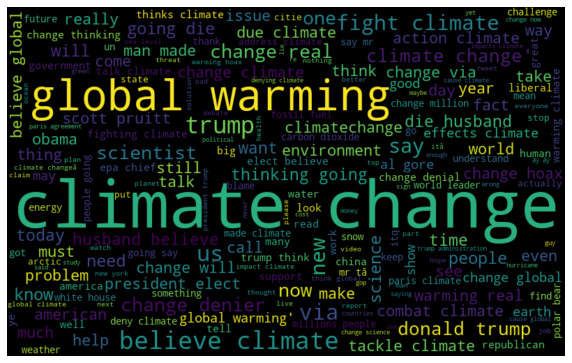

In [32]:
# generating a word cloud to analyse if the common words have changed after data cleaning
all_words = ' '.join([text for text in clean_df['text']])

wordcloud = WordCloud(stopwords=STOPWORDS,width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()